<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2'

In [4]:
os.listdir(base_path)

['data_multi_delta_2_n20.csv',
 'data_multi_delta_2_n30.csv',
 'data_multi_delta_2_n60.csv',
 'data_multi_delta_2_n120.csv',
 'data_multi_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,82.646100,41.272994,23.528825,45.260231,-27.099699,175.608450,200.462322,-24.853872
1,0.0,1.0,61.390523,93.656793,93.356551,51.461138,120.982830,430.847836,333.478879,97.368957
2,0.0,2.0,84.408356,28.506811,30.938553,30.321284,-23.372032,160.802971,203.647936,-42.844965
3,0.0,3.0,78.483465,59.065299,95.878804,92.895843,-5.469349,330.854062,360.214262,-29.360200
4,0.0,4.0,89.101143,40.132533,43.431715,23.160956,55.135658,260.962005,235.428873,25.533132
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,73.375386,67.433045,83.791863,77.804877,-154.958052,157.447119,320.033732,-162.586613
59996,999.0,56.0,59.436122,85.461651,63.137953,69.644585,127.155883,414.836193,285.975315,128.860878
59997,999.0,57.0,32.056041,59.371953,56.709558,36.256703,-39.121524,155.272732,200.196838,-44.924105
59998,999.0,58.0,29.279691,57.466650,94.037743,68.078973,58.425687,317.288745,271.681845,45.606899


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,82.646100,41.272994,23.528825,45.260231,-27.099699,175.608450,200.462322,-24.853872
1,0.0,1.0,61.390523,93.656793,93.356551,51.461138,120.982830,430.847836,333.478879,97.368957
2,0.0,2.0,84.408356,28.506811,30.938553,30.321284,-23.372032,160.802971,203.647936,-42.844965
3,0.0,3.0,78.483465,59.065299,95.878804,92.895843,-5.469349,330.854062,360.214262,-29.360200
4,0.0,4.0,89.101143,40.132533,43.431715,23.160956,55.135658,260.962005,235.428873,25.533132
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,73.375386,67.433045,83.791863,77.804877,-154.958052,157.447119,320.033732,-162.586613
59996,999.0,56.0,59.436122,85.461651,63.137953,69.644585,127.155883,414.836193,285.975315,128.860878
59997,999.0,57.0,32.056041,59.371953,56.709558,36.256703,-39.121524,155.272732,200.196838,-44.924105
59998,999.0,58.0,29.279691,57.466650,94.037743,68.078973,58.425687,317.288745,271.681845,45.606899


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    82.646100  41.272994  23.528825  45.260231  -27.099699   
      1.0    61.390523  93.656793  93.356551  51.461138  120.982830   
      2.0    84.408356  28.506811  30.938553  30.321284  -23.372032   
      3.0    78.483465  59.065299  95.878804  92.895843   -5.469349   
      4.0    89.101143  40.132533  43.431715  23.160956   55.135658   
...                ...        ...        ...        ...         ...   
999.0 55.0   73.375386  67.433045  83.791863  77.804877 -154.958052   
      56.0   59.436122  85.461651  63.137953  69.644585  127.155883   
      57.0   32.056041  59.371953  56.709558  36.256703  -39.121524   
      58.0   29.279691  57.466650  94.037743  68.078973   58.425687   
      59.0   81.773907  94.751487  67.520069  56.089868  -88.684235   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    175.608450  200.462322  -24.853872  
      1.0    430.847836  333.478879   97.368957  
      2.0    160.802971  203.647936  -42.844965  
      3.0    330.854062  360.214262  -29.360200  
      4.0    260.962005  235.428873   25.533132  
...                 ...         ...         ...  
999.0 55.0   157.447119  320.033732 -162.586613  
      56.0   414.836193  285.975315  128.860878  
      57.0   155.272732  200.196838  -44.924105  
      58.0   317.288745  271.681845   45.606899  
      59.0   221.451096  322.128490 -100.677395  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    82.646100  41.272994  23.528825  45.260231  -27.099699   
      1.0    61.390523  93.656793  93.356551  51.461138  120.982830   
      2.0    84.408356  28.506811  30.938553  30.321284  -23.372032   
      3.0    78.483465  59.065299  95.878804  92.895843   -5.469349   
      4.0    89.101143  40.132533  43.431715  23.160956   55.135658   
...                ...        ...        ...        ...         ...   
999.0 55.0   73.375386  67.433045  83.791863  77.804877 -154.958052   
      56.0   59.436122  85.461651  63.137953  69.644585  127.155883   
      57.0   32.056041  59.371953  56.709558  36.256703  -39.121524   
      58.0   29.279691  57.466650  94.037743  68.078973   58.425687   
      59.0   81.773907  94.751487  67.520069  56.089868  -88.684235   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    175.608450  200.462322  -24.853872  
      1.0    430.847836  333.478879   97.368957  
      2.0    160.802971  203.647936  -42.844965  
      3.0    330.854062  360.214262  -29.360200  
      4.0    260.962005  235.428873   25.533132  
...                 ...         ...         ...  
999.0 55.0   157.447119  320.033732 -162.586613  
      56.0   414.836193  285.975315  128.860878  
      57.0   155.272732  200.196838  -44.924105  
      58.0   317.288745  271.681845   45.606899  
      59.0   221.451096  322.128490 -100.677395  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,82.646100,41.272994,23.528825,45.260231,-27.099699,175.608450,200.462322,-24.853872
1,0.0,1.0,61.390523,93.656793,93.356551,51.461138,120.982830,430.847836,333.478879,97.368957
2,0.0,2.0,84.408356,28.506811,30.938553,30.321284,-23.372032,160.802971,203.647936,-42.844965
3,0.0,3.0,78.483465,59.065299,95.878804,92.895843,-5.469349,330.854062,360.214262,-29.360200
4,0.0,4.0,89.101143,40.132533,43.431715,23.160956,55.135658,260.962005,235.428873,25.533132
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,73.375386,67.433045,83.791863,77.804877,-154.958052,157.447119,320.033732,-162.586613
59996,999.0,56.0,59.436122,85.461651,63.137953,69.644585,127.155883,414.836193,285.975315,128.860878
59997,999.0,57.0,32.056041,59.371953,56.709558,36.256703,-39.121524,155.272732,200.196838,-44.924105
59998,999.0,58.0,29.279691,57.466650,94.037743,68.078973,58.425687,317.288745,271.681845,45.606899


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    82.646100  41.272994  23.528825  45.260231  -27.099699   
      1.0    61.390523  93.656793  93.356551  51.461138  120.982830   
      2.0    84.408356  28.506811  30.938553  30.321284  -23.372032   
      3.0    78.483465  59.065299  95.878804  92.895843   -5.469349   
      4.0    89.101143  40.132533  43.431715  23.160956   55.135658   
...                ...        ...        ...        ...         ...   
999.0 55.0   73.375386  67.433045  83.791863  77.804877 -154.958052   
      56.0   59.436122  85.461651  63.137953  69.644585  127.155883   
      57.0   32.056041  59.371953  56.709558  36.256703  -39.121524   
      58.0   29.279691  57.466650  94.037743  68.078973   58.425687   
      59.0   81.773907  94.751487  67.520069  56.089868  -88.684235   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    175.608450  200.462322  -24.853872  
      1.0    430.847836  333.478879   97.368957  
      2.0    160.802971  203.647936  -42.844965  
      3.0    330.854062  360.214262  -29.360200  
      4.0    260.962005  235.428873   25.533132  
...                 ...         ...         ...  
999.0 55.0   157.447119  320.033732 -162.586613  
      56.0   414.836193  285.975315  128.860878  
      57.0   155.272732  200.196838  -44.924105  
      58.0   317.288745  271.681845   45.606899  
      59.0   221.451096  322.128490 -100.677395  

[60000 rows x 8 columns]

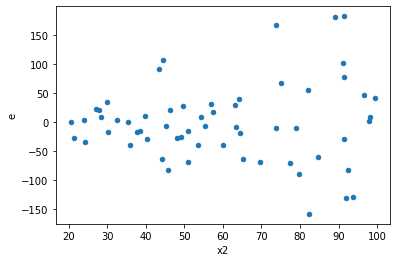

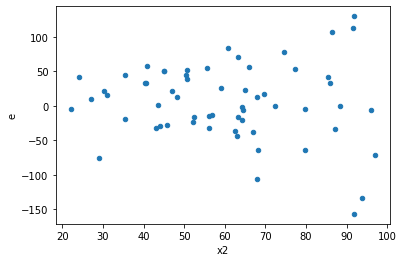

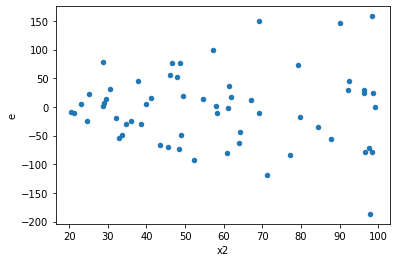

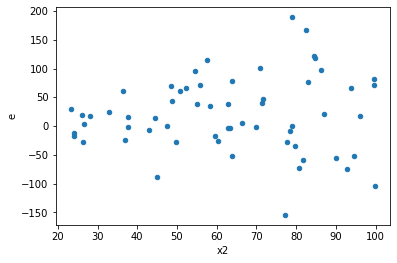

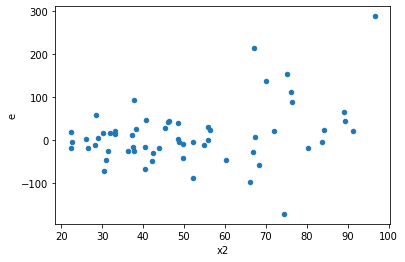

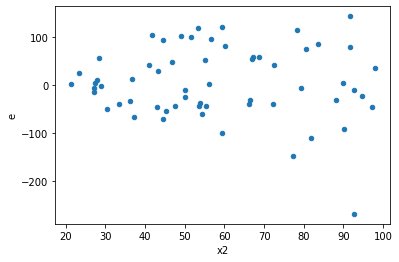

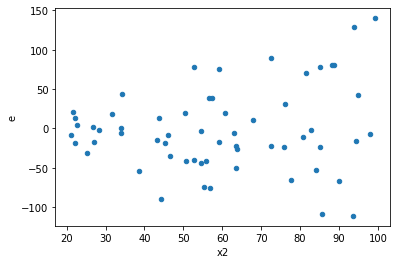

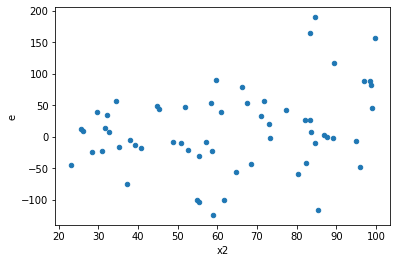

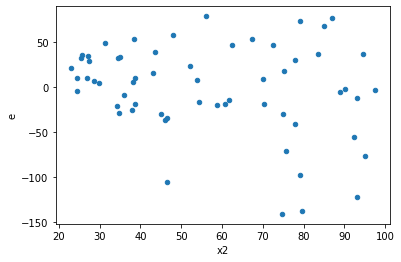

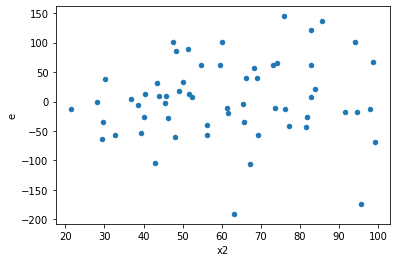

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,20.0,20.0,97018.07837965565,123863.79382636811,4850.903918982783,6193.1896913184055,1.2767083815210043,0.590027807559494,0.704986096220253,0.295013903779747,Reject005=1 : Homoscedasticity
1.0,20.0,20.0,50714.49325415385,67733.27455409129,2535.7246627076925,3386.6637277045643,1.3355802297904946,0.5235309605443903,0.7382345197278048,0.26176548027219515,Reject005=1 : Homoscedasticity
3.0,20.0,20.0,21435.88081551229,28640.957444426753,1071.7940407756146,1432.0478722213377,1.336122256459853,0.5229508129772178,0.7385245935113911,0.2614754064886089,Reject005=1 : Homoscedasticity
4.0,20.0,20.0,71152.06723010394,163287.57686936605,3557.6033615051974,8164.378843468303,2.2949098069251908,0.07039639290369637,0.9648018035481518,0.035198196451848185,Reject005=1 : Homoscedasticity
5.0,20.0,20.0,36121.934533679516,80111.018314782,1806.0967266839757,4005.5509157391,2.2177942391232612,0.08242698039619856,0.9587865098019007,0.04121349019809928,Reject005=1 : Homoscedasticity
6.0,20.0,20.0,30822.03097961053,136821.18840503323,1541.1015489805263,6841.059420251661,4.439071146724353,0.001592518665325393,0.9992037406673373,0.0007962593326626966,Reject005=0 : Heteroscedasticity
8.0,20.0,20.0,42451.60137799177,104253.72180846351,2122.5800688995887,5212.686090423175,2.4558254205814687,0.05087260513508873,0.9745636974324556,0.025436302567544367,Reject005=1 : Homoscedasticity
9.0,20.0,20.0,49348.37646525094,130986.65403592067,2467.418823262547,6549.332701796034,2.6543255000122645,0.034379148410941474,0.9828104257945293,0.017189574205470737,Reject005=0 : Heteroscedasticity
10.0,20.0,20.0,76319.32290841117,98339.52030272952,3815.9661454205584,4916.976015136476,1.2885271587215759,0.5761159198914396,0.7119420400542802,0.2880579599457198,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,97018.07837965565,123863.79382636811,4850.903918982783,6193.1896913184055,1.2767083815210043,0.590027807559494,Reject005=1 : Homoscedasticity
1.0,20.0,20.0,50714.49325415385,67733.27455409129,2535.7246627076925,3386.6637277045643,1.3355802297904946,0.5235309605443903,Reject005=1 : Homoscedasticity
2.0,20.0,20.0,75084.9597611906,63310.48880325572,3754.24798805953,3165.524440162786,0.843184693773775,0.7065872093035649,Reject005=1 : Homoscedasticity
3.0,20.0,20.0,21435.88081551229,28640.957444426753,1071.7940407756146,1432.0478722213377,1.336122256459853,0.5229508129772178,Reject005=1 : Homoscedasticity
4.0,20.0,20.0,71152.06723010394,163287.57686936605,3557.6033615051974,8164.378843468303,2.2949098069251908,0.07039639290369637,Reject005=1 : Homoscedasticity
5.0,20.0,20.0,36121.934533679516,80111.018314782,1806.0967266839757,4005.5509157391,2.2177942391232612,0.08242698039619856,Reject005=1 : Homoscedasticity
6.0,20.0,20.0,30822.03097961053,136821.18840503323,1541.1015489805263,6841.059420251661,4.439071146724353,0.001592518665325393,Reject005=0 : Heteroscedasticity
7.0,20.0,20.0,105884.57549647648,84507.30315368813,5294.228774823824,4225.365157684407,0.7981077768640654,0.6188516410589857,Reject005=1 : Homoscedasticity
8.0,20.0,20.0,42451.60137799177,104253.72180846351,2122.5800688995887,5212.686090423175,2.4558254205814687,0.05087260513508873,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      665
Reject005=0 : Heteroscedasticity    335
Name: Result_test, dtype: int64